# Cargar librerias

In [39]:
import pandas as pd
import matplotlib.pyplot as plt


## Cargar Archivo .csv

In [40]:
# Configura pandas para no usar notación científica
pd.set_option('display.float_format', '{:.2f}'.format)
# Lee el archivo CSV
df = pd.read_csv('../Data/db/Originales/inmuebles_dommies.csv')
df.dropna(inplace=True)
# Muestra las primeras filas del archivo
df.head(3)

,titulo,localizacion,precio,baños,habitabiones,metros_construidos,estrato,parqueadero,gas_natural,conina_integral,...,cancha_tenis,terraza,internet,tanque_de_de_agua,permite_ninos,solo_familias,sauna,estudio,conserje,caseta_vigilancia
0,Casa en venta en Manga,Manga,700000000,2.00,3.00,166.00,5.00,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Casa en venta en Manga,Manga,700000000,2.00,3.00,166.00,5.00,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Casa en venta en La Princesa,La Princesa,235000000,2.00,3.00,73.00,3.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Filtrado sobre precio.

/tmp/ipykernel_439985/301453713.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Precio', 'Metros Construidos'])


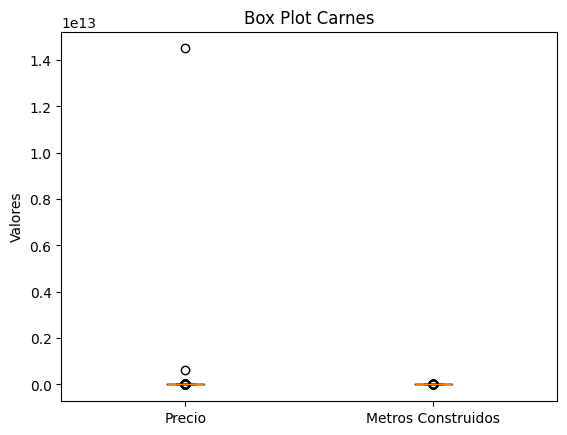

In [41]:
data = [df['precio'], df['metros_construidos']]

# Crear el gráfico de boxplot
plt.boxplot(data, labels=['Precio', 'Metros Construidos'])

# Título y etiquetas
plt.title("Box Plot Carnes")
plt.ylabel("Valores")

# Mostrar el gráfico
plt.show()

In [42]:
filtro=(df['precio'] > 60000000) & (df['precio']<2000000000)
df=df[filtro].copy()
df.head(3)

,titulo,localizacion,precio,baños,habitabiones,metros_construidos,estrato,parqueadero,gas_natural,conina_integral,...,cancha_tenis,terraza,internet,tanque_de_de_agua,permite_ninos,solo_familias,sauna,estudio,conserje,caseta_vigilancia
0,Casa en venta en Manga,Manga,700000000,2.00,3.00,166.00,5.00,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Casa en venta en Manga,Manga,700000000,2.00,3.00,166.00,5.00,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Casa en venta en La Princesa,La Princesa,235000000,2.00,3.00,73.00,3.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Minimo y maximos de Metros Cuadrados.

In [43]:
minimo = min(df['metros_construidos'])
maximo = max(df['metros_construidos'])
print(f"Minimo de Mtr²: {minimo}, y maximo de Mtr²: {maximo}")


Minimo de Mtr²: 2.0, y maximo de Mtr²: 47679.0


## Filtrado de Metros cuadrados

In [44]:
filtro = (df['metros_construidos'] >= 40) & (df['metros_construidos'] <= maximo) & df['metros_construidos'].notnull()
df=df[filtro].copy()
df.reset_index(drop=True, inplace=True)
df.head(3)

,titulo,localizacion,precio,baños,habitabiones,metros_construidos,estrato,parqueadero,gas_natural,conina_integral,...,cancha_tenis,terraza,internet,tanque_de_de_agua,permite_ninos,solo_familias,sauna,estudio,conserje,caseta_vigilancia
0,Casa en venta en Manga,Manga,700000000,2.00,3.00,166.00,5.00,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Casa en venta en Manga,Manga,700000000,2.00,3.00,166.00,5.00,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Casa en venta en La Princesa,La Princesa,235000000,2.00,3.00,73.00,3.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Resumen

In [45]:
# Resumen completo
resumen_completo = df.describe(include='all')
print(resumen_completo)

                            titulo localizacion        precio  baños  \
count                          821          821        821.00 821.00   
unique                         125          125           NaN    NaN   
top     Casa en venta en Cartagena    Cartagena           NaN    NaN   
freq                           138          138           NaN    NaN   
mean                           NaN          NaN  754072277.46   3.32   
std                            NaN          NaN  470857194.09   1.31   
min                            NaN          NaN  165000000.00   2.00   
25%                            NaN          NaN  380000000.00   2.00   
50%                            NaN          NaN  600000000.00   3.00   
75%                            NaN          NaN 1030000000.00   4.00   
max                            NaN          NaN 1990000000.00   9.00   

        habitabiones  metros_construidos  estrato  parqueadero  gas_natural  \
count         821.00              821.00   821.00       

## Limpiar datos de localización donde tenga conincidencia que no sean barrios

In [46]:
# Eliminar filas donde 'localizacion' contiene los valores específicos
df = df[~df['localizacion'].str.contains('Provincia de Cartagena|Cartagena', na=False)]

# Eliminación de outlier

In [47]:
#Calcular IQR

q1 = df['precio'].quantile(0.25)
q3 = df['precio'].quantile(0.75)

iqr = q3 - q1

#Definicion de limites

limite_inf = q1 -1.5*iqr
limite_sup = q3+1.5*iqr

#identificar outlayer
outlier = df[(df['precio']<limite_inf) | (df['precio']>limite_sup)]

#df=df.drop(outlier.index)
print(outlier)

                               titulo     localizacion      precio  baños  \
27        Casa en venta en Santa Rita       Santa Rita  1750000000   9.00   
42             Casa en venta en Manga            Manga  1860000000   2.00   
66        Casa en venta en Santa Rita       Santa Rita  1800000000   3.00   
82       Casa en venta en Pie de Popa      Pie de Popa  1836000000   5.00   
120      Casa en venta en Pie de Popa      Pie de Popa  1800000000   4.00   
150           Casa en venta en Amador           Amador  1800000000   5.00   
252           Casa en venta en Crespo           Crespo  1990000000   5.00   
319        Casa en venta en San Pedro        San Pedro  1800000000   3.00   
339         Casa en venta en Marbella         Marbella  1800000000   3.00   
359       Casa en venta en Santa Rita       Santa Rita  1800000000   4.00   
368            Casa en venta en Manga            Manga  1839600000   7.00   
447           Casa en venta en Crespo           Crespo  1900000000   5.00   

In [48]:
df=df.drop(outlier.index)
df.reset_index()

,index,titulo,localizacion,precio,baños,habitabiones,metros_construidos,estrato,parqueadero,gas_natural,...,cancha_tenis,terraza,internet,tanque_de_de_agua,permite_ninos,solo_familias,sauna,estudio,conserje,caseta_vigilancia
0,0,Casa en venta en Manga,Manga,700000000,2.00,3.00,166.00,5.00,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Casa en venta en Manga,Manga,700000000,2.00,3.00,166.00,5.00,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,Casa en venta en La Princesa,La Princesa,235000000,2.00,3.00,73.00,3.00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Casa en venta en El Recreo,El Recreo,640000000,5.00,5.00,210.00,4.00,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6,Casa en venta en Manga,Manga,640000000,4.00,5.00,160.00,4.00,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,814,Casa en venta en Campestre,Campestre,415000000,2.00,4.00,216.00,4.00,0,0,...,0,0,0,0,0,0,0,0,0,0
624,815,Casa en venta en Manga,Manga,1000000000,3.00,4.00,222.00,5.00,1,0,...,0,0,0,0,0,0,0,0,0,0
625,816,Casa en venta en Camaguey,Camaguey,390000000,2.00,3.00,78.00,3.00,1,0,...,0,0,0,0,0,0,0,0,0,0
626,818,Casa en venta en Santa Rita,Santa Rita,520000000,2.00,4.00,100.00,4.00,0,1,...,0,0,0,0,0,0,0,0,0,0


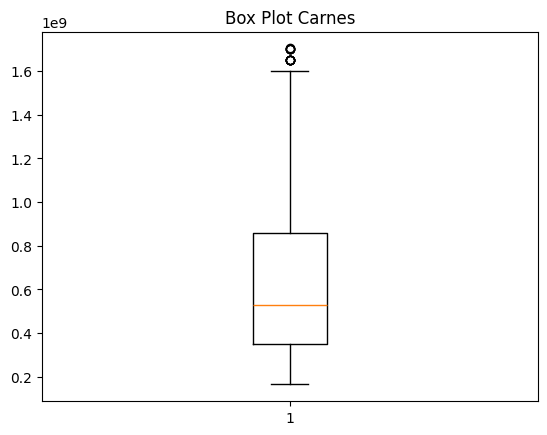

In [49]:

plt.boxplot(df['precio'])
plt.title("Box Plot Carnes")
plt.show()

## Exportar Datos limpios

In [50]:
df.to_csv('../Data/db/Procesados/data_limpia.csv', index=False)